## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

# from statsmodels.tsa.arima.model import ARIMA

## Importing the Data and Pre-processing 

In [10]:
url = './ignore/S3/L11/Index2018.csv'
raw_csv_data = pd.read_csv(url) 
df=raw_csv_data.copy()
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index("date", inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [11]:
df['market_value']=df.ftse

In [12]:
del df['spx']
del df['dax']
del df['ftse']
del df['nikkei']
size = int(len(df)*0.8)
df_train, df_test = df.iloc[:size], df.iloc[size:]


## The LLR Test

In [13]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [14]:
df_train['returns'] = df_train['market_value'].pct_change(1)*100

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_47192/844452794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['returns'] = df_train['market_value'].pct_change(1)*100


In [27]:
df_train.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


## ACF for Returns

(-0.1, 0.1)

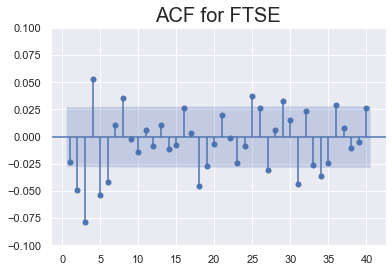

In [20]:
sgt.plot_acf(df_train['returns'][1:], lags=40, zero=False)
plt.title("ACF for FTSE", size=20)
plt.ylim(-0.1, 0.1)

## MA(1) for Returns

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [26]:
ret_model_ma1 = ARIMA(df_train['returns'][1:], order=(0,0,1))
results_model_ma1 = ret_model_ma1.fit()
print(results_model_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Tue, 03 Jan 2023   AIC                          15865.190
Time:                        16:55:03   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.0

## Higher-Lag MA Models for Returns

In [29]:
ret_model_ma2 = ARIMA(df_train['returns'], order=(0,0,2))
results_ret_model_ma2 = ret_model_ma2.fit()
print(results_ret_model_ma2.summary())
print(f'LLR Test for MA(2) vs MA(1) model: {LLR_test(ret_model_ma1, ret_model_ma2)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7922.864
Date:                Tue, 03 Jan 2023   AIC                          15853.728
Time:                        17:04:24   BIC                          15879.813
Sample:                    01-07-1994   HQIC                         15862.868
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.204      0.228      -0.012       0.049
ma.L1         -0.0327      0.009     -3.760      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.416      0.0

In [30]:
ret_model_ma3 = ARIMA(df_train['returns'], order=(0, 0, 3))
results_ret_model_ma3 = ret_model_ma3.fit()
print(results_ret_model_ma3.summary())
print(f'LLR Test for MA(3) vs MA(2) model: {LLR_test(ret_model_ma2, ret_model_ma3)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7904.317
Date:                Tue, 03 Jan 2023   AIC                          15818.634
Time:                        17:25:17   BIC                          15851.241
Sample:                    01-07-1994   HQIC                         15830.060
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.296      0.195      -0.010       0.048
ma.L1         -0.0203      0.009     -2.334      0.020      -0.037      -0.003
ma.L2         -0.0556      0.008     -7.032      0.0

In [31]:
ret_model_ma4 = ARIMA(df_train['returns'], order=(0, 0, 4))
results_ret_model_ma4 = ret_model_ma4.fit()
print(results_ret_model_ma4.summary())
print(f'LLR Test for MA(4) vs MA(3) model: {LLR_test(ret_model_ma3, ret_model_ma4)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7898.773
Date:                Tue, 03 Jan 2023   AIC                          15809.547
Time:                        17:25:47   BIC                          15848.675
Sample:                    01-07-1994   HQIC                         15823.258
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.236      0.217      -0.011       0.049
ma.L1         -0.0203      0.009     -2.239      0.025      -0.038      -0.003
ma.L2         -0.0551      0.008     -6.835      0.0

In [32]:
ret_model_ma5 = ARIMA(df_train['returns'], order=(0, 0, 5))
results_ret_model_ma5 = ret_model_ma5.fit()
print(results_ret_model_ma5.summary())
print(f'LLR Test for MA(5) vs MA(4) model: {LLR_test(ret_model_ma4, ret_model_ma5)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7892.823
Date:                Tue, 03 Jan 2023   AIC                          15799.645
Time:                        17:26:16   BIC                          15845.295
Sample:                    01-07-1994   HQIC                         15815.642
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.282      0.200      -0.010       0.048
ma.L1         -0.0262      0.009     -2.839      0.005      -0.044      -0.008
ma.L2         -0.0497      0.008     -6.147      0.0

In [33]:
ret_model_ma6 = ARIMA(df_train['returns'], order=(0, 0, 6))
results_ret_model_ma6 = ret_model_ma6.fit()
print(results_ret_model_ma6.summary())
print(f'LLR Test for MA(6) vs MA(5) model: {LLR_test(ret_model_ma5, ret_model_ma6)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7889.221
Date:                Tue, 03 Jan 2023   AIC                          15794.442
Time:                        17:26:39   BIC                          15846.613
Sample:                    01-07-1994   HQIC                         15812.723
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.318      0.188      -0.009       0.047
ma.L1         -0.0237      0.009     -2.562      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.0

In [34]:
ret_model_ma7 = ARIMA(df_train['returns'], order=(0, 0, 7))
results_ret_model_ma7 = ret_model_ma7.fit()
print(results_ret_model_ma7.summary())
print(f'LLR Test for MA(7) vs MA(6) model: {LLR_test(ret_model_ma6, ret_model_ma7)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7889.046
Date:                Tue, 03 Jan 2023   AIC                          15796.091
Time:                        17:27:13   BIC                          15854.784
Sample:                    01-07-1994   HQIC                         15816.658
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.303      0.193      -0.010       0.047
ma.L1         -0.0247      0.009     -2.645      0.008      -0.043      -0.006
ma.L2         -0.0488      0.008     -6.000      0.0

In [36]:
ret_model_ma8 = ARIMA(df_train['returns'], order=(0, 0, 8))
results_ret_model_ma8 = ret_model_ma8.fit()
print(results_ret_model_ma8.summary())
print(f'LLR Test for MA(8) vs MA(7) model: {LLR_test(ret_model_ma7, ret_model_ma8)}')
print(f'LLR Test for MA(8) vs MA(6) model: {LLR_test(ret_model_ma6, ret_model_ma8, DF=2)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Tue, 03 Jan 2023   AIC                          15791.205
Time:                        17:28:24   BIC                          15856.419
Sample:                    01-07-1994   HQIC                         15814.057
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

In [37]:
ret_model_ma9 = ARIMA(df_train['returns'], order=(0, 0, 9))
results_ret_model_ma9 = ret_model_ma9.fit()
print(results_ret_model_ma9.summary())
print(f'LLR Test for MA(9) vs MA(8) model: {LLR_test(ret_model_ma8, ret_model_ma9)}')

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 9)   Log Likelihood               -7885.457
Date:                Tue, 03 Jan 2023   AIC                          15792.914
Time:                        17:28:54   BIC                          15864.650
Sample:                    01-07-1994   HQIC                         15818.051
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.255      0.209      -0.011       0.048
ma.L1         -0.0242      0.009     -2.565      0.010      -0.043      -0.006
ma.L2         -0.0494      0.008     -6.015      0.0

## Residuals for Returns

In [42]:
df_train['res_ret_ma8'] = results_ret_model_ma8.resid[1:]

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_47192/1029554502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['res_ret_ma8'] = results_ret_model_ma8.resid[1:]


In [46]:
print(f"Mean: {round(df_train['res_ret_ma8'].mean(), 3)}")
print(f"Standard Deviation: {round(sqrt(df_train['res_ret_ma8'].var()), 3)}")

Mean: -0.0
Standard Deviation: 1.164



    3 standard deviations = 1.164 * 3 = 3.492, 7% = [-3.5%, 3.5%]

<AxesSubplot:title={'center':'Plot of residuals for ma8'}, xlabel='Date', ylabel='Residuals'>

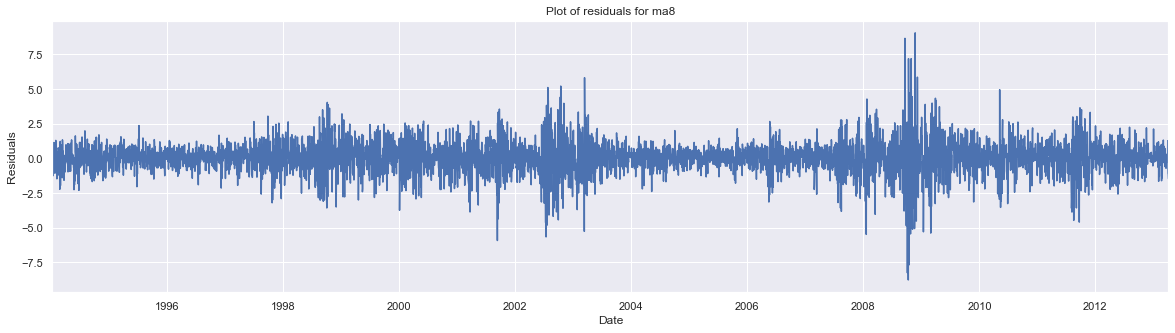

In [54]:
df_train['res_ret_ma8'][1:].plot(figsize=(20,5), title="Plot of residuals for ma8", xlabel='Date', ylabel='Residuals')

In [57]:
sts.adfuller(df_train['res_ret_ma8'][1:])

(-70.83777222257486,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15689.881935682464)

(-0.1, 0.1)

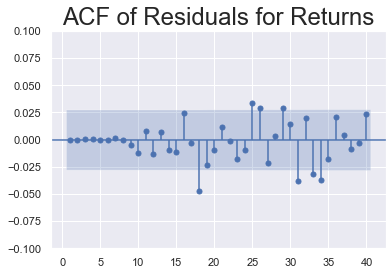

In [59]:
sgt.plot_acf(df_train['res_ret_ma8'][1:], zero=False, lags=40)
plt.title("ACF of Residuals for Returns", size=24)
plt.ylim(-0.1,0.1)

(-0.1, 0.1)

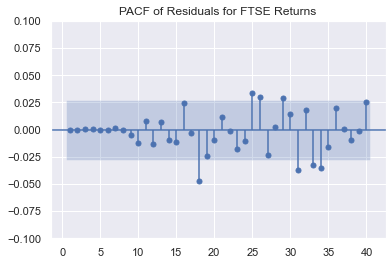

In [63]:
sgt.plot_pacf(df_train['res_ret_ma8'][1:], zero=False, lags=40, method='ols')
plt.title("PACF of Residuals for FTSE Returns")
plt.ylim(-0.1, 0.1)

In [70]:
df_train['res_ret_ma6'] = results_ret_model_ma6.resid[1:]

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_47192/1964822179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['res_ret_ma6'] = results_ret_model_ma6.resid[1:].copy()


In [85]:
print(round(df_train['res_ret_ma6'][1:].mean(), 3))
print(round(sqrt(df_train['res_ret_ma6'][1:].var())))

-0.0
1


    apparently MA(6) is better because of the standard deviation?!

Text(0.5, 1.0, 'Residuals for the MA(6) FTSE100 model')

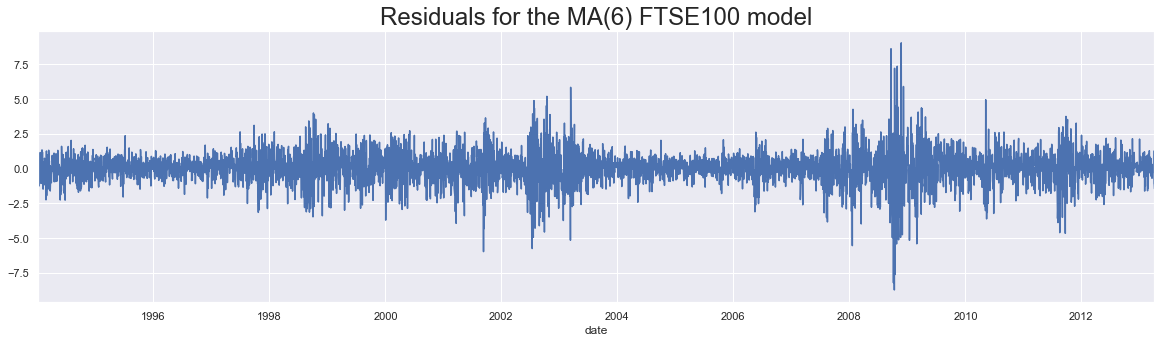

In [75]:
df_train['res_ret_ma6'].plot(figsize=(20,5))
plt.title("Residuals for the MA(6) FTSE100 model", size=24)

In [76]:
sts.adfuller(df_train['res_ret_ma6'][1:])

(-70.84148865346621,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15697.059691586986)

(-0.1, 0.1)

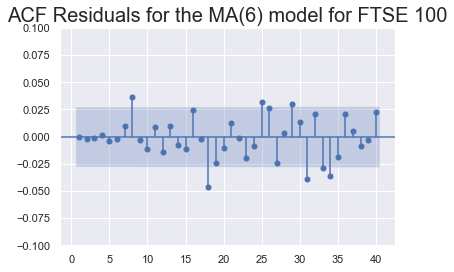

In [79]:
sgt.plot_acf(df_train['res_ret_ma6'][1:], lags=40, zero=False)
plt.title("ACF Residuals for the MA(6) model for FTSE 100", size=20)
plt.ylim(-0.1, 0.1)

(-0.1, 0.1)

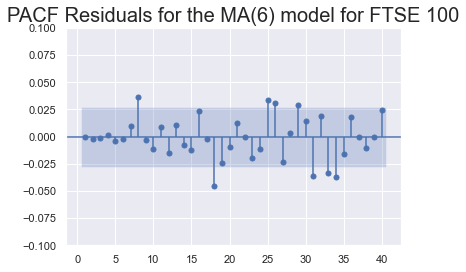

In [81]:
sgt.plot_pacf(df_train['res_ret_ma6'][1:], lags=40, zero=False, method='ols')
plt.title("PACF Residuals for the MA(6) model for FTSE 100", size=20)
plt.ylim(-0.1, 0.1)

## Normalized Returns

In [86]:
df_train['returns']

date
1994-01-07         NaN
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
                ...   
2013-04-01    0.000000
2013-04-02    1.230867
2013-04-03   -1.084327
2013-04-04   -1.186397
2013-04-05   -1.487049
Freq: B, Name: returns, Length: 5021, dtype: float64

In [94]:
benchmark_returns = df_train['returns'][1]
df_train['norm_returns'] = df_train['returns'].div(benchmark_returns).mul(100)
print(benchmark_returns)
print(df_train['norm_returns'].head())

-0.1567043337454055
date
1994-01-07           NaN
1994-01-10    100.000000
1994-01-11    497.260711
1994-01-12    780.443046
1994-01-13    227.285567
Freq: B, Name: norm_returns, dtype: float64


/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_47192/2269686995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['norm_returns'] = df_train['returns'].div(benchmark_returns).mul(100)


(-0.1, 0.1)

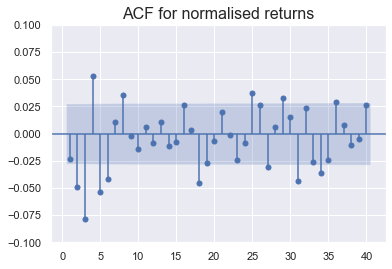

In [103]:
sgt.plot_acf(df_train['norm_returns'][1:], lags=40, zero=False)
plt.title("ACF for normalised returns", size=16)
plt.ylim(-0.1, 0.1)

(-0.1, 0.1)

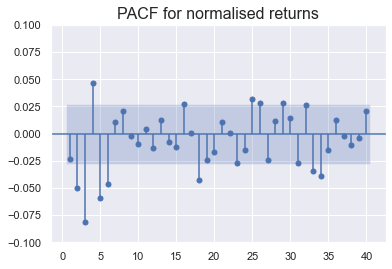

In [104]:
sgt.plot_pacf(df_train['norm_returns'][1:], lags=40, zero=False, method='ols')
plt.title("PACF for normalised returns", size=16)
plt.ylim(-0.1, 0.1)

In [128]:
norm_ret_model_ma8 = ARIMA(df_train['norm_returns'], order=(0, 0, 8))
results_norm_ret_model_ma8 = norm_ret_model_ma8.fit()
print(results_norm_ret_model_ma8.summary())

                               SARIMAX Results                                
Dep. Variable:           norm_returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -40307.614
Date:                Tue, 03 Jan 2023   AIC                          80635.228
Time:                        22:06:01   BIC                          80700.442
Sample:                    01-07-1994   HQIC                         80658.079
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.658     -1.240      0.215     -30.902       6.956
ma.L1         -0.0238      0.009     -2.518      0.012      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.030      0.0

In [129]:
df_train['res_norm_ret_ma8'] = results_norm_ret_model_ma8.resid

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_47192/1271362535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['res_norm_ret_ma8'] = results_norm_ret_model_ma8.resid


In [130]:
df_train['res_norm_ret_ma8']

date
1994-01-07           NaN
1994-01-10    111.973051
1994-01-11    511.769304
1994-01-12    810.005932
1994-01-13    296.494800
                 ...    
2013-04-01     18.143343
2013-04-02   -809.966529
2013-04-03    694.368391
2013-04-04    734.590009
2013-04-05    939.407458
Freq: B, Name: res_norm_ret_ma8, Length: 5021, dtype: float64

In [131]:
print(round(df_train['res_norm_ret_ma8'].mean(), 3))
print(round(df_train['res_norm_ret_ma8'].std(), 3))

-0.073
742.898


<AxesSubplot:title={'center':'Plot of White Noise for Normalise Data'}, xlabel='date'>

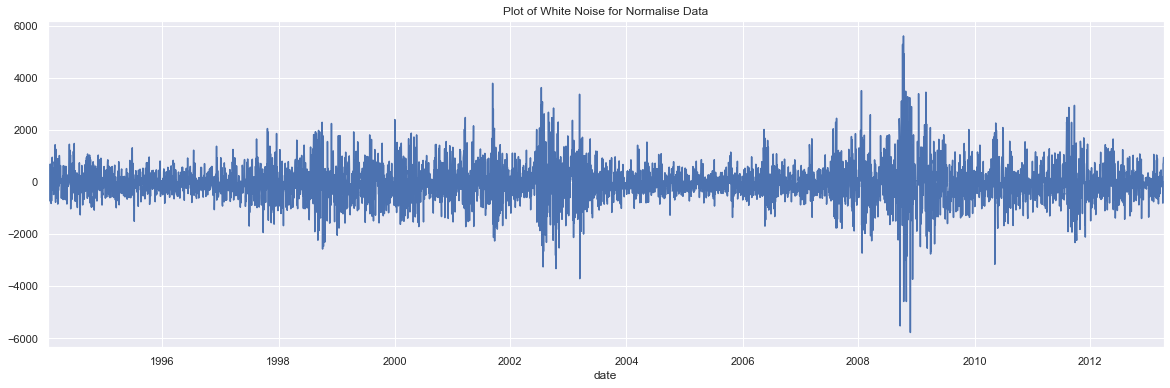

In [134]:
df_train['res_norm_ret_ma8'].plot(figsize=(20, 6), title='Plot of White Noise for Normalise Data')

(-0.1, 0.1)

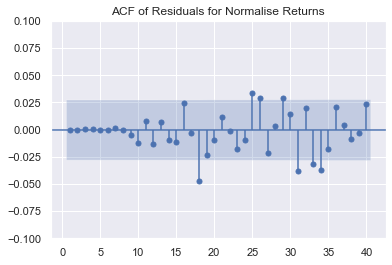

In [135]:
sgt.plot_acf(df_train['res_norm_ret_ma8'][1:], lags=40, zero=False)
plt.title("ACF of Residuals for Normalise Returns")
plt.ylim(-0.1, 0.1)

(-0.1, 0.1)

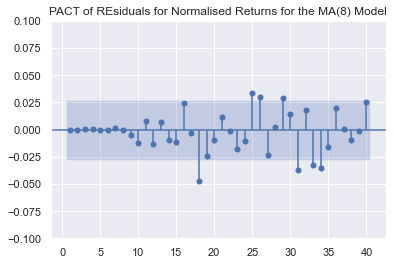

In [136]:
sgt.plot_pacf(df_train['res_norm_ret_ma8'][1:], lags=40, zero=False, method='ols')
plt.title("PACT of REsiduals for Normalised Returns for the MA(8) Model")
plt.ylim(-0.1, 0.1)

In [137]:
norm_ret_model_ma6 = ARIMA(df_train['norm_returns'], order=(0, 0, 6))
results_norm_ret_model_ma6 = norm_ret_model_ma6.fit()
print(results_norm_ret_model_ma6.summary())
print(f'LLR Test for MA(8) vs MA(6) model: {LLR_test(norm_ret_model_ma6, norm_ret_model_ma8)}')

                               SARIMAX Results                                
Dep. Variable:           norm_returns   No. Observations:                 5021
Model:                 ARIMA(0, 0, 6)   Log Likelihood              -40311.224
Date:                Tue, 03 Jan 2023   AIC                          80638.448
Time:                        22:16:28   BIC                          80690.619
Sample:                    01-07-1994   HQIC                         80656.729
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.180     -1.304      0.192     -29.966       6.020
ma.L1         -0.0237      0.009     -2.556      0.011      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.967      0.0

In [139]:
df_train['res_norm_ret_ma6'] = results_norm_ret_model_ma6.resid

/var/folders/2h/c7dkm6rj2w318lkvfrnrk2c00000gn/T/ipykernel_47192/192795297.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['res_norm_ret_ma6'] = results_norm_ret_model_ma6.resid


Text(0.5, 1.0, 'Residual plot for Normalised Returns of the MA(6) Model')

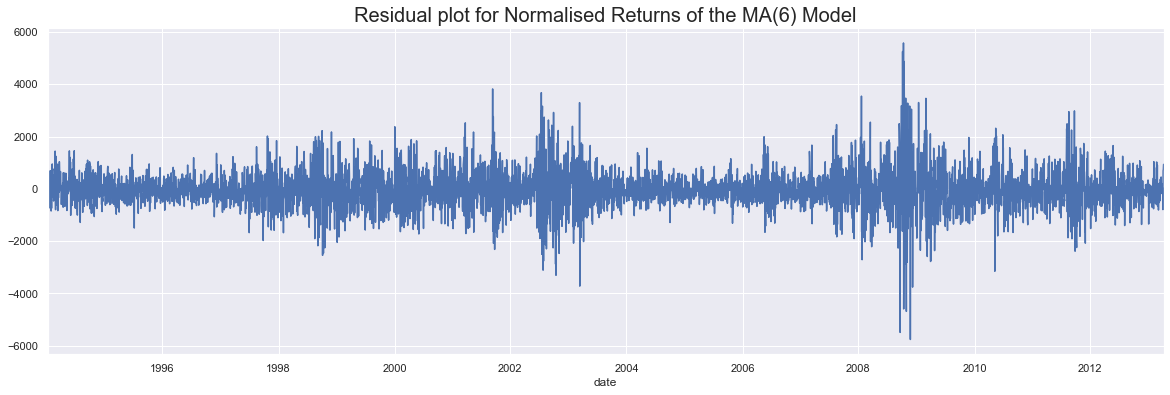

In [145]:
df_train['res_norm_ret_ma6'].plot(figsize=(20,6))
plt.title("Residual plot for Normalised Returns of the MA(6) Model", size=20)

(-0.1, 0.1)

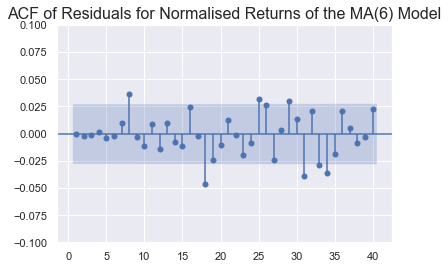

In [151]:
sgt.plot_acf(df_train['res_norm_ret_ma6'][1:], lags=40, zero=False)
plt.title("ACF of Residuals for Normalised Returns of the MA(6) Model", size=16)
plt.ylim(-0.1, 0.1)

(-0.1, 0.1)

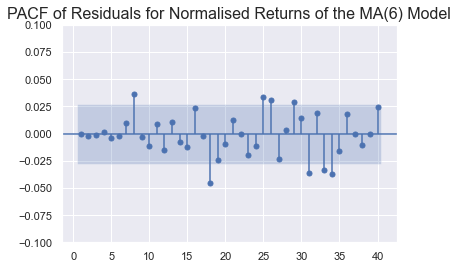

In [153]:
sgt.plot_pacf(df_train['res_norm_ret_ma6'][1:], lags=40, zero=False, method='ols')
plt.title("PACF of Residuals for Normalised Returns of the MA(6) Model", size=16)
plt.ylim(-0.1, 0.1)

## MA Models For Prices

    Autoregressive models are less reliable when estimating non-stationary data

In [158]:
df_train.head()

,market_value,returns,res_ret_ma8,res_ret_ma6,norm_returns,res_norm_ret_ma8,res_norm_ret_ma6
date,,,,,,,
1994-01-07,3445.98,NaN,NaN,NaN,NaN,NaN,NaN
1994-01-10,3440.58,-0.156704,-0.175607,-0.175617,100.000000,111.973051,111.973051
1994-01-11,3413.77,-0.779229,-0.802107,-0.802080,497.260711,511.769304,511.745632
1994-01-12,3372.02,-1.222988,-1.269464,-1.268794,780.443046,810.005932,809.575357
1994-01-13,3360.01,-0.356166,-0.464783,-0.461334,227.285567,296.494800,294.296227


Text(0.5, 1.0, 'ACF for Prices')

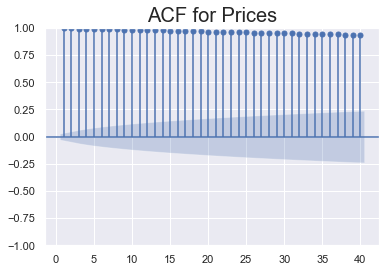

In [157]:
sgt.plot_acf(df_train['market_value'], lags=40, zero=False)
plt.title("ACF for Prices", size=20)

    It seems like you need an infinite MA model i.e. (MA(inf)) to model prices. No such thing exists!

In [159]:
model_ma1 = ARIMA(df['market_value'], order=(0,0,1))
results_ma1 = model_ma1.fit()
print(results_ma1.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -48997.927
Date:                Tue, 03 Jan 2023   AIC                          98001.855
Time:                        23:35:49   BIC                          98022.089
Sample:                    01-07-1994   HQIC                         98008.866
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6858     15.628    347.056      0.000    5393.056    5454.315
ma.L1          0.9639      0.003    282.849      0.000       0.957       0.971
sigma2      3.528e+05   8385.151     42.071      0.0

In [160]:
model_ma2 = ARIMA(df['market_value'], order=(0,0,2))
results_ma2 = model_ma2.fit()
print(results_ma2.summary())

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 6277
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -45657.315
Date:                Tue, 03 Jan 2023   AIC                          91322.631
Time:                        23:36:15   BIC                          91349.609
Sample:                    01-07-1994   HQIC                         91331.978
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6811     16.125    336.348      0.000    5392.076    5455.286
ma.L1          1.6302      0.006    268.554      0.000       1.618       1.642
ma.L2          0.8842      0.006    144.727      0.0

    ARMA(1,1)
    AR(1) - takes the number of lagged values
    MA(1) - takes the number of lagged errors